## Coses que no funcionen

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Branch length distribution

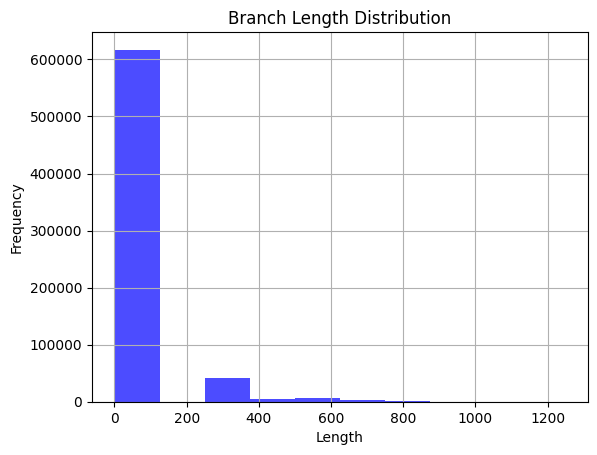

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load your skeleton data (assuming it's in a NumPy array format)
skeleton_data = np.load('/content/drive/MyDrive/Colab_Notebooks/Special Course/skeleton.npy')

# Function to compute branch lengths
def compute_branch_lengths(skeleton):
    lengths = []
    for branch in skeleton:
        # Assuming each branch is represented as a list of points (x, y, z)
        for i in range(len(branch) - 1):
            point1 = branch[i]
            point2 = branch[i + 1]
            length = np.linalg.norm(point2 - point1)  # Euclidean distance
            lengths.append(length)
    return lengths

# Compute branch lengths
branch_lengths = compute_branch_lengths(skeleton_data)

# Plotting the distribution of branch lengths
plt.hist(branch_lengths, bins=10, alpha=0.7, color='blue')
plt.title('Branch Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## AVG BRANCH I NUMBER OF BRANCHES

In [4]:
import skan

In [7]:
import numpy as np
from skan import Skeleton, summarize

# Load skeleton data from a .npy file
def load_skeleton(file_path):
    skeleton = np.load(file_path)
    print("Skeleton shape:", skeleton.shape)  # Check shape
    return skeleton

# Binarize the skeleton if necessary
def binarize_skeleton(skeleton, threshold=1):
    return (skeleton >= threshold).astype(np.uint8)

# Compute number of branches and average branch length
def compute_branch_metrics(skeleton):
    # Ensure the skeleton is binary
    binary_skeleton = binarize_skeleton(skeleton)

    # Create a Skeleton object
    skel = Skeleton(binary_skeleton)

    # Summarize branch data
    branch_data = summarize(skel)

    # Calculate metrics
    num_branches = len(branch_data)  # Number of branches
    average_branch_length = branch_data['branch-distance'].mean()  # Average length of branches

    return num_branches, average_branch_length

# Example Usage
if __name__ == "__main__":
    # Load skeleton from .npy file
    skeleton_file_path = '/content/drive/MyDrive/Colab_Notebooks/Special Course/skeleton.npy'  # Replace with your file path
    skeleton = load_skeleton(skeleton_file_path)

    # Compute branch metrics
    num_branches, avg_branch_length = compute_branch_metrics(skeleton)

    # Print results
    print("Number of Branches:", num_branches)

    print("Average Branch Length:", avg_branch_length)

Skeleton shape: (698, 964, 964)
Number of Branches: 18773
Average Branch Length: 4.595382493398158
